In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
%config InlineBackend.figure_format='retina'
import collections
import copy
from scipy import stats
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['mathtext.rm'] = 'serif'
rcParams['mathtext.it'] = 'serif:italic'
rcParams['mathtext.bf'] = 'serif:bold'
rcParams['axes.titlepad'] = 12

In [2]:
from halotools.sim_manager import CachedHaloCatalog

from halotools.mock_observables import return_xyz_formatted_array
from calc_jk_real import calc_jk_real

In [4]:
Lbox = 250.
Ng = int(0.006515886336*Lbox**3)

In [5]:
pi_max = 60
r_wp = np.logspace(-1, 1.5, 30)
##wp

In [6]:
bolp = CachedHaloCatalog(simname = 'bolplanck', version_name = 'halotools_v0p4', redshift = 0, \
                                halo_finder = 'rockstar')
bolshoi = CachedHaloCatalog(simname = 'bolshoi', version_name = 'halotools_v0p4', redshift = 0, \
                                halo_finder = 'rockstar')

In [8]:
wp_bolp = {}
halocat = bolp

for los_direction in 'xyz':
    if los_direction=='x':
        xyz = 'yzx'
    elif los_direction=='y':
        xyz = 'xzy'
    elif los_direction=='z':
        xyz = 'xyz'
    
    table = halocat.halo_table[np.argsort(-halocat.halo_table['halo_vpeak'])[:Ng]]
    
    pos_gals_d = return_xyz_formatted_array(*(table['halo_'+ax] for ax in xyz), \
            velocity=table['halo_v'+los_direction], velocity_distortion_dimension='z', period=Lbox) ##redshift space distorted
    pos_gals_d = np.array(pos_gals_d,dtype=float)
    
    
    wp_bolp[los_direction] = calc_jk_real(pos_gals_d, Lbox, wbool=30, dbool=0, vbool=0, cbool=0, abool=0, rbool=0, jackknife_nside=0,\
                 rbins_wp=r_wp, zmax=pi_max,)

In [10]:
wp_bol = {}
halocat = bolshoi

for los_direction in 'xyz':
    if los_direction=='x':
        xyz = 'yzx'
    elif los_direction=='y':
        xyz = 'xzy'
    elif los_direction=='z':
        xyz = 'xyz'
    
    table = halocat.halo_table[np.argsort(-halocat.halo_table['halo_vpeak'])[:Ng]]
    
    pos_gals_d = return_xyz_formatted_array(*(table['halo_'+ax] for ax in xyz), \
            velocity=table['halo_v'+los_direction], velocity_distortion_dimension='z', period=Lbox) ##redshift space distorted
    pos_gals_d = np.array(pos_gals_d,dtype=float)
    
    
    wp_bol[los_direction] = calc_jk_real(pos_gals_d, Lbox, wbool=30, dbool=0, vbool=0, cbool=0, abool=0, rbool=0, jackknife_nside=0,\
                 rbins_wp=r_wp, zmax=pi_max,)

In [9]:
wp_bolp

{'x': array([  6.51584000e-03,   5.37889419e+02,   4.72984983e+02,
          4.04904103e+02,   3.48594092e+02,   3.06709121e+02,
          2.55326432e+02,   2.20213372e+02,   1.90143992e+02,
          1.58628050e+02,   1.31542520e+02,   1.08723138e+02,
          9.01632831e+01,   7.32410439e+01,   6.10215935e+01,
          5.05988945e+01,   4.33566100e+01,   3.66625571e+01,
          3.18937041e+01,   2.88431037e+01,   2.48255288e+01,
          2.15473394e+01,   1.74549445e+01,   1.45033485e+01,
          1.22784422e+01,   9.97412512e+00,   8.12008809e+00,
          6.18893429e+00,   4.89386678e+00,   3.75918520e+00]),
 'y': array([  6.51584000e-03,   5.42418439e+02,   4.85297464e+02,
          4.09087670e+02,   3.54818075e+02,   3.00874814e+02,
          2.64957123e+02,   2.22941627e+02,   1.89874961e+02,
          1.61645444e+02,   1.34770754e+02,   1.10744934e+02,
          9.18599417e+01,   7.55174524e+01,   6.27565490e+01,
          5.25847837e+01,   4.30487262e+01,   3.72797848e+

In [11]:
r_wp_cen = (r_wp[1:]+r_wp[:-1])/2.

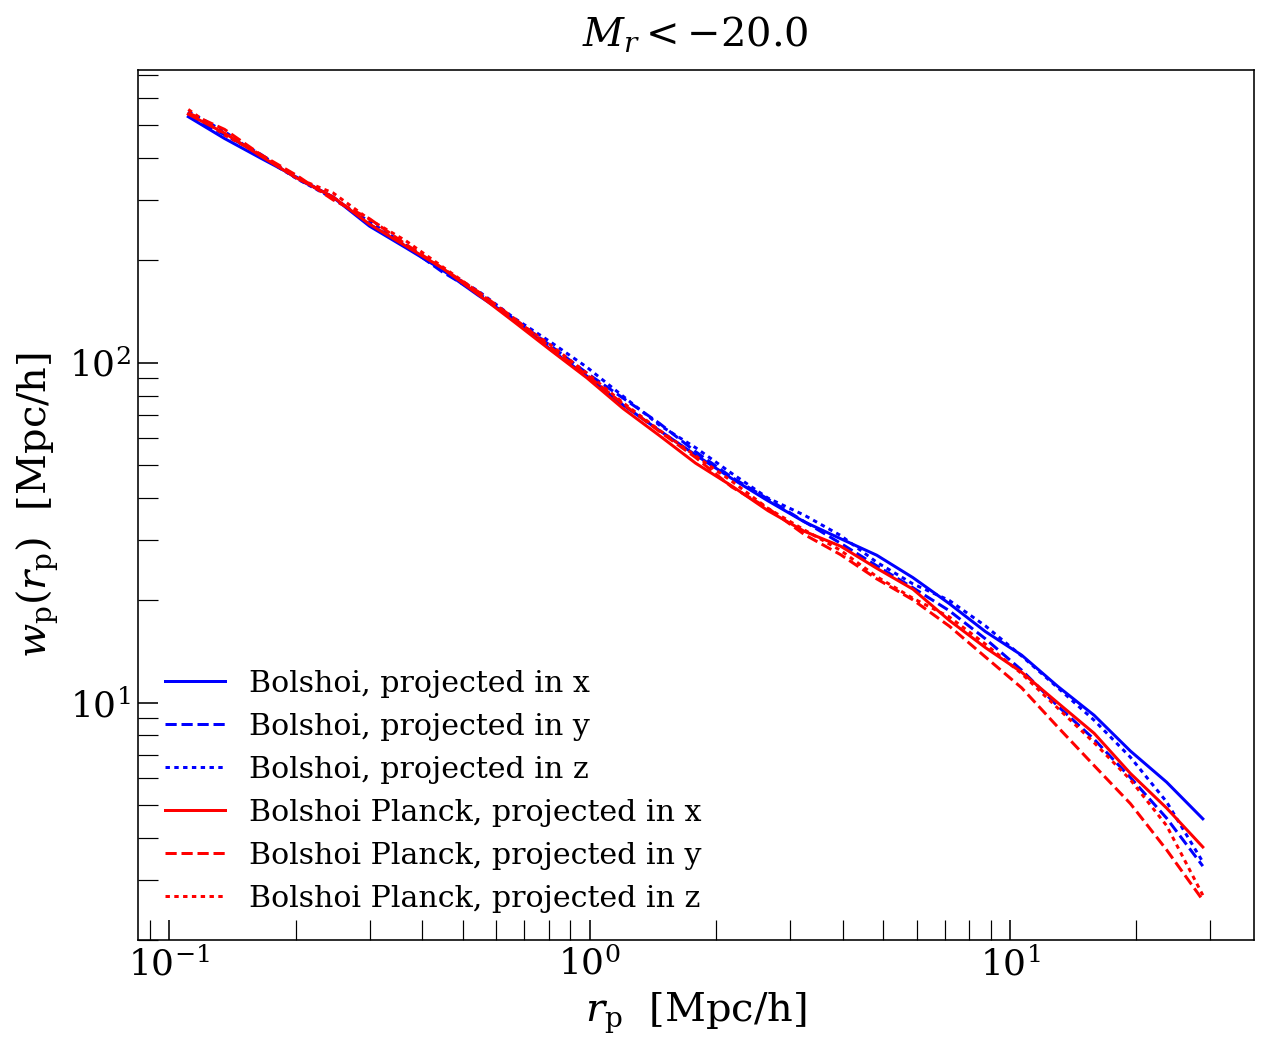

In [25]:
plt.figure(figsize=(10,8))
plt.title(r'$M_r<-20.0$',fontsize=20)
plt.plot(r_wp_cen,wp_bol['x'][1:],'b-',label='Bolshoi, projected in x')
plt.plot(r_wp_cen,wp_bol['y'][1:],'b--',label='Bolshoi, projected in y')
plt.plot(r_wp_cen,wp_bol['z'][1:],'b:',label='Bolshoi, projected in z')
plt.plot(r_wp_cen,wp_bolp['x'][1:],'r-',label='Bolshoi Planck, projected in x')
plt.plot(r_wp_cen,wp_bolp['y'][1:],'r--',label='Bolshoi Planck, projected in y')
plt.plot(r_wp_cen,wp_bolp['z'][1:],'r:',label='Bolshoi Planck, projected in z')
plt.loglog()
plt.legend(frameon=False,fontsize=15,loc=3,markerscale=1)
plt.xlabel(r'$r_\mathrm{p}$  $\mathrm{[Mpc/h]}$',fontsize=20)
plt.ylabel(r'$w_\mathrm{p}(r_\mathrm{p})$  $\mathrm{[Mpc/h]}$',fontsize=20)
plt.tick_params(which=u'both',labelsize=18,length=10,direction='in')


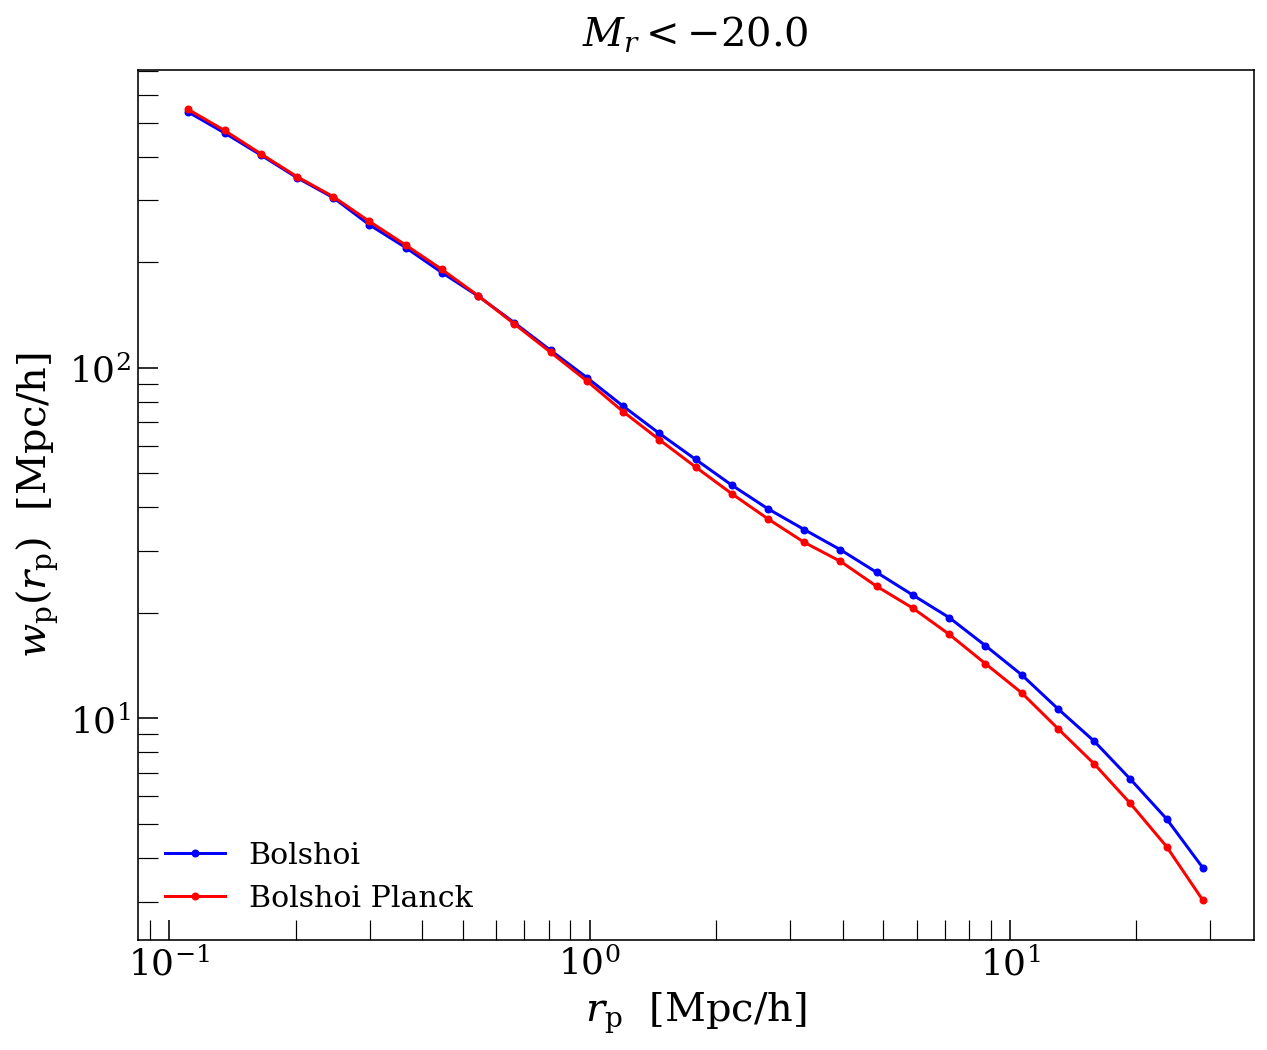

In [27]:
plt.figure(figsize=(10,8))
plt.title(r'$M_r<-20.0$',fontsize=20)
plt.plot(r_wp_cen,(wp_bol['x'][1:]+wp_bol['y'][1:]+wp_bol['z'][1:])/3.,'b.-',label='Bolshoi')
plt.plot(r_wp_cen,(wp_bolp['x'][1:]+wp_bolp['y'][1:]+wp_bolp['z'][1:])/3.,'r.-',label='Bolshoi Planck')

plt.loglog()
plt.legend(frameon=False,fontsize=15,loc=3,markerscale=1)
plt.xlabel(r'$r_\mathrm{p}$  $\mathrm{[Mpc/h]}$',fontsize=20)
plt.ylabel(r'$w_\mathrm{p}(r_\mathrm{p})$  $\mathrm{[Mpc/h]}$',fontsize=20)
plt.tick_params(which=u'both',labelsize=18,length=10,direction='in')


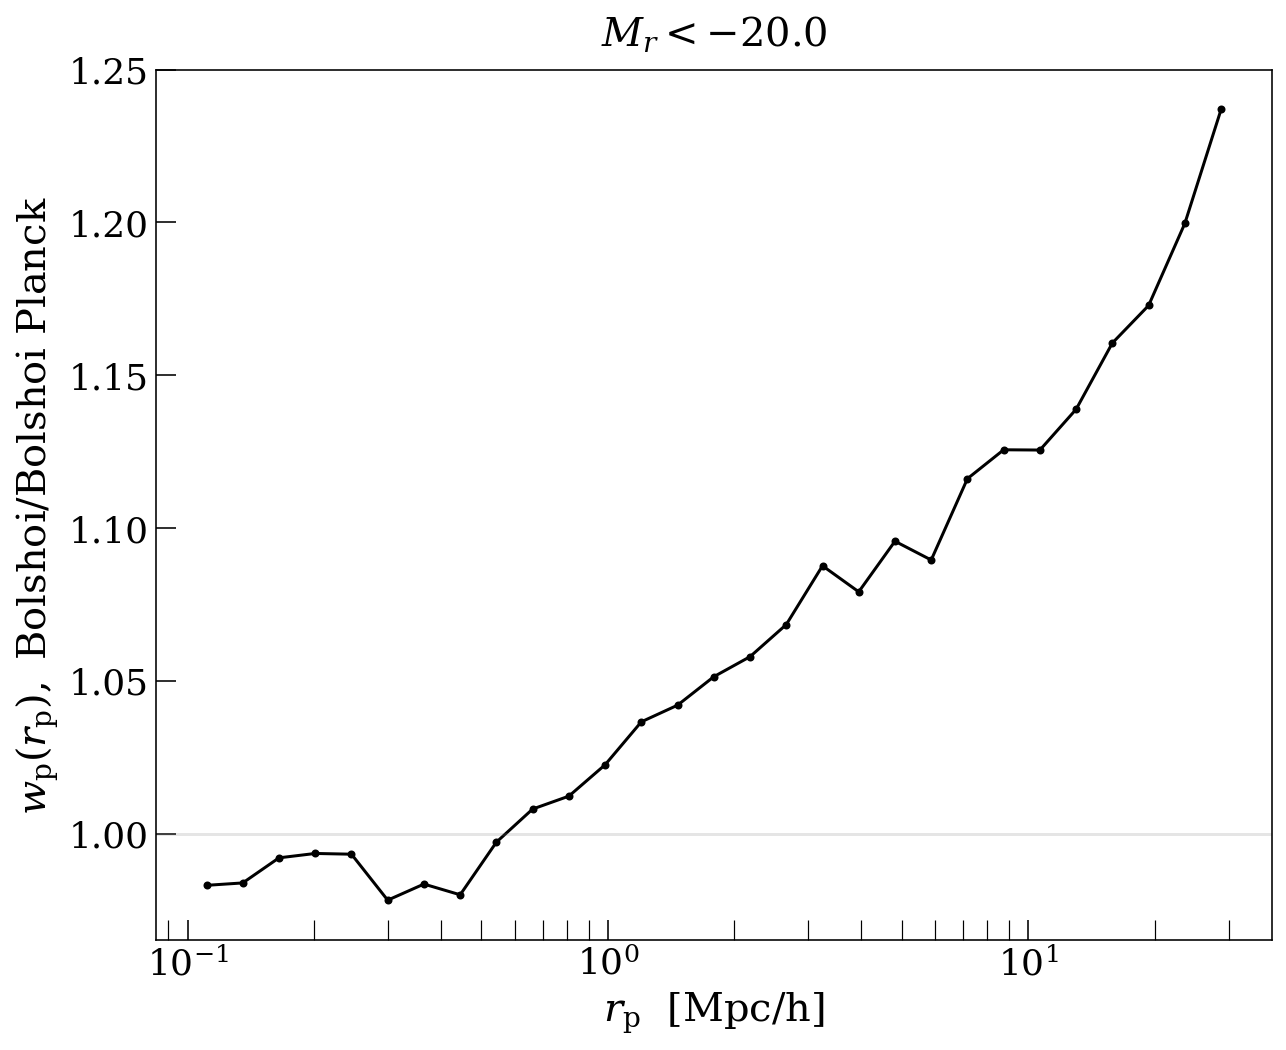

In [35]:
plt.figure(figsize=(10,8))
plt.title(r'$M_r<-20.0$',fontsize=20)
plt.plot(r_wp_cen,(wp_bol['x'][1:]+wp_bol['y'][1:]+wp_bol['z'][1:])/(wp_bolp['x'][1:]+wp_bolp['y'][1:]+wp_bolp['z'][1:]),'k.-')

plt.semilogx()
plt.legend(frameon=False,fontsize=15,loc=3,markerscale=1)
plt.xlabel(r'$r_\mathrm{p}$  $\mathrm{[Mpc/h]}$',fontsize=20)
plt.ylabel(r'$w_\mathrm{p}(r_\mathrm{p}),\ \mathrm{Bolshoi/Bolshoi\ Planck}$',fontsize=20)
plt.tick_params(which=u'both',labelsize=18,length=10,direction='in')
plt.axhline(1,color='grey',alpha=0.2)